# Mutational profile

In [1]:
%run ./functions_to_plot_profiles.py

In [2]:
import json
samples_dict = json.load(open('../../../cases_ids.json','rb'))
samples_dict

{'case1': {'normal': 'AQ5175',
  'tumor1': 'AQ5181',
  'tumor2': 'AQ5187',
  'sex': 'female'},
 'case2': {'normal': 'AQ5176',
  'tumor1': 'AQ5182',
  'tumor2': 'AQ5188',
  'sex': 'male'},
 'case3': {'normal': 'AQ5174',
  'tumor1': 'AQ5180',
  'tumor2': 'AQ5186',
  'sex': 'female',
  'kidney': 'AX4954',
  'liver': 'AX4955',
  'pancreas': 'AX4956',
  'heart': 'AX4957',
  'clone1': 'AX4958',
  'clone2': 'AX4961',
  'mother': 'AW8063',
  'father': 'AW8064',
  'lung': 'AX4962',
  'medulla': 'AX4963',
  'spleen': 'AX4964',
  'brain': 'AX4965',
  'bma': 'AX4966'},
 'case4': {'normal': 'AW8061',
  'tumor1': 'AW8050',
  'tumor2': 'AW8051',
  'sex': 'female'}}

## SBS31 signature

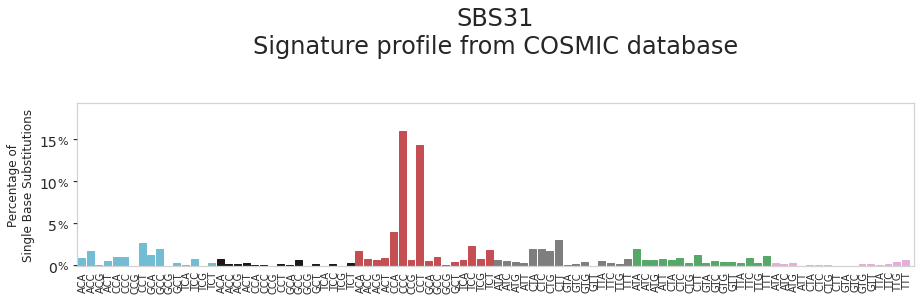

In [6]:
file = './data/COSMIC_v3.3.1_SBS_GRCh38.txt'

df1 = pd.read_csv(file,sep='\t')
dictionary= dict(zip(df1['Type'],df1['SBS31']))

dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
plot_signature(dict_counts, title='SBS31\nSignature profile from COSMIC database',fig=fig,ax=ax,figsize=(15,3),pad=50,labels=[])
plt.ylabel('Percentage of\nSingle Base Substitutions',size=12)
ax.yaxis.set_label_coords(-.05, .5)
for pos in range(0,16,5):
    plt.text(x=-2.8,y=pos-0.4,s='%',size=11)
for pos in range(0,16,5):
    plt.text(x=-1,y=pos-0.4,s='-',size=14)
ax.spines['left'].set_color('lightgrey')        
ax.spines['top'].set_color('lightgrey')  
ax.spines['bottom'].set_color('lightgrey')        
ax.spines['right'].set_color('lightgrey') 
ax.grid(False)
plt.savefig('./figures_papers/SBS31_profile.png',dpi=300, format='png',transparent=True,bbox_inches='tight')
plt.show()

## Clonal vs. subclonals mutations

In [3]:
#change at the end
pt_to_case = {'case1':'pt2','case2':'pt3','case3':'pt1','case4':'pt8'}
root_out = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"
# root_out = '../vcf_postprocessing/output/'

In [4]:
title_dict = {'case1_tumor1':'Case 1, ARMS',
             'case1_tumor2':'Case 1, tAML',
             'case2_tumor1':'Case 2, EPN',
             'case2_tumor2':'Case 2, DMG',
             'case3_tumor1':'Case 3, NB',
             'case3_tumor2':'Case 3, MRT',
             'case4_tumor1':'Case 4, BL',
             'case4_tumor2':'Case 4, THC'}

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/workspace/projects/sjd_pediatric_tumors/second-tumors-children/wgs_analysis/tumor_vs_blood/mutational_profiles/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


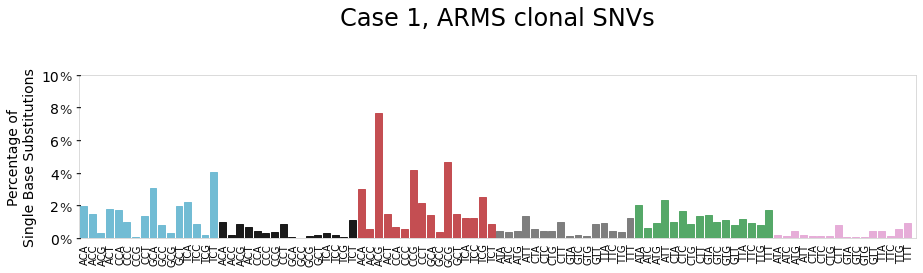

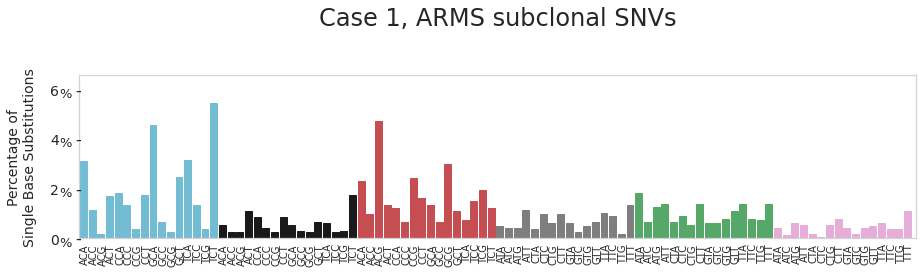

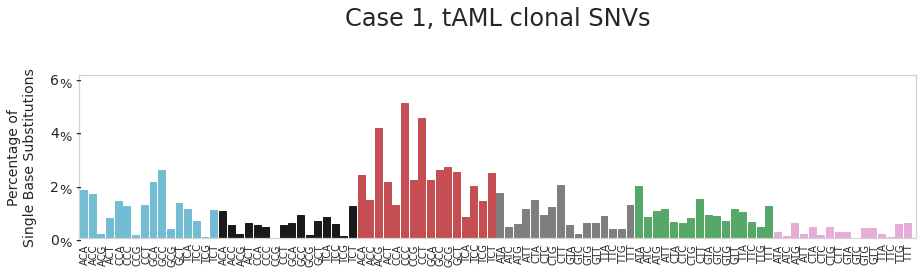

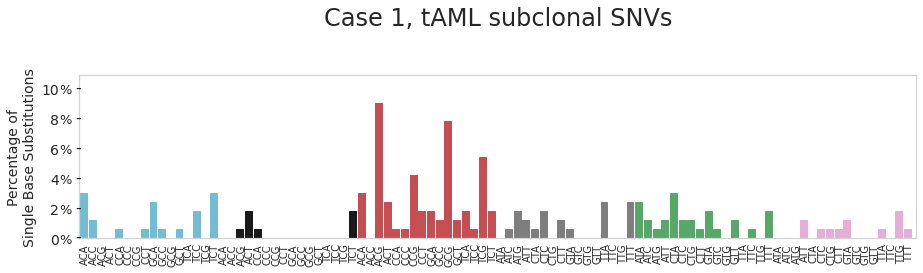

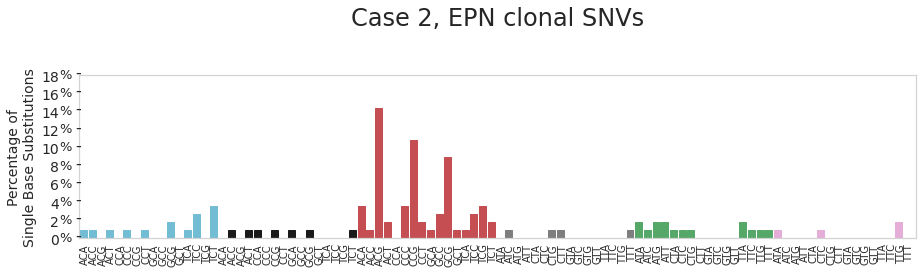

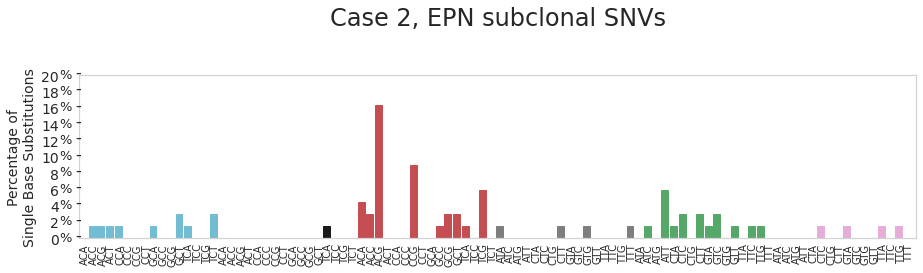

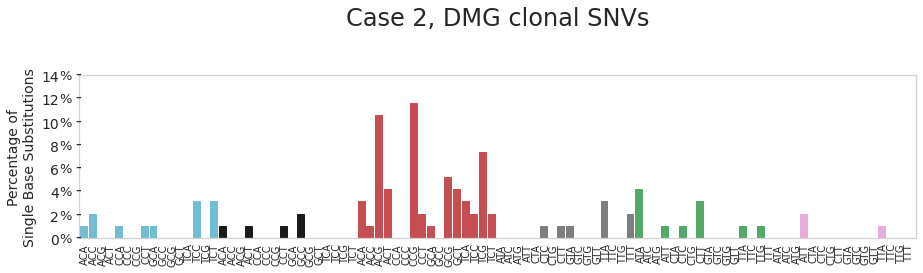

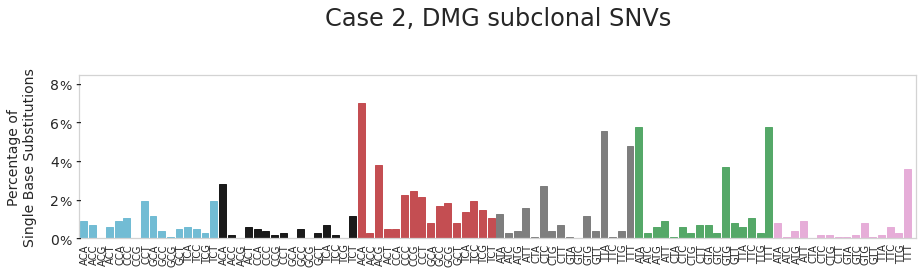

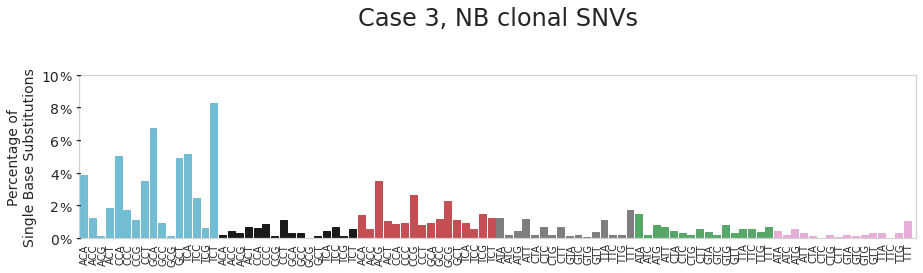

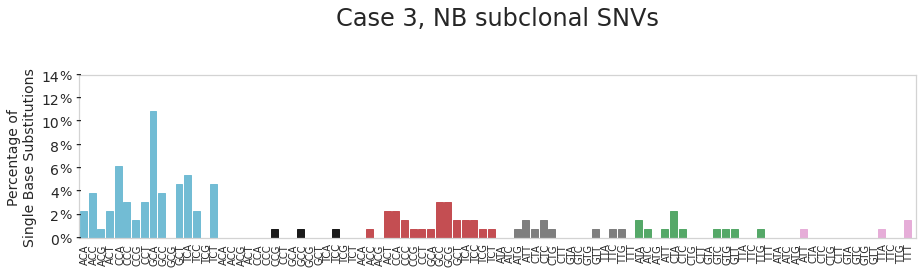

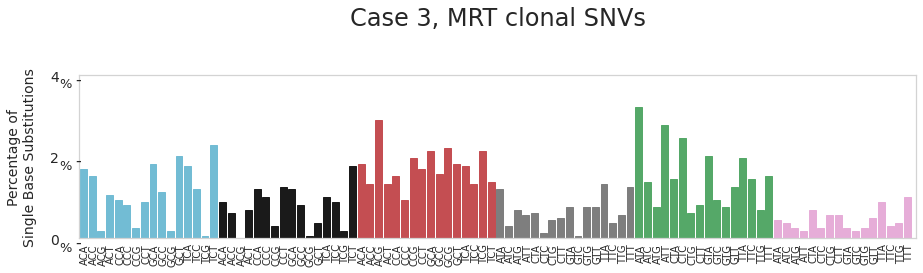

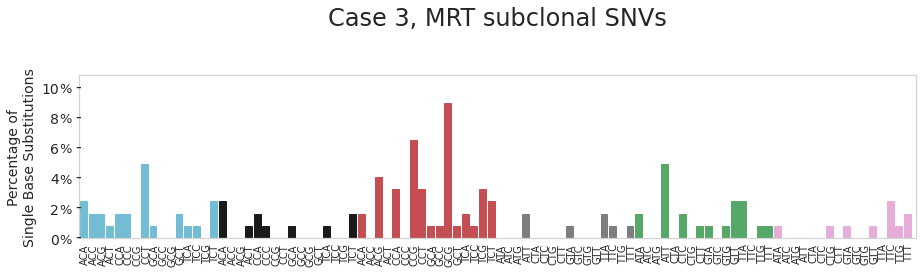

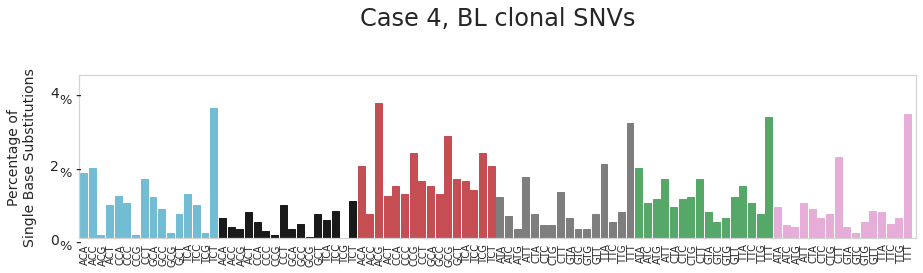

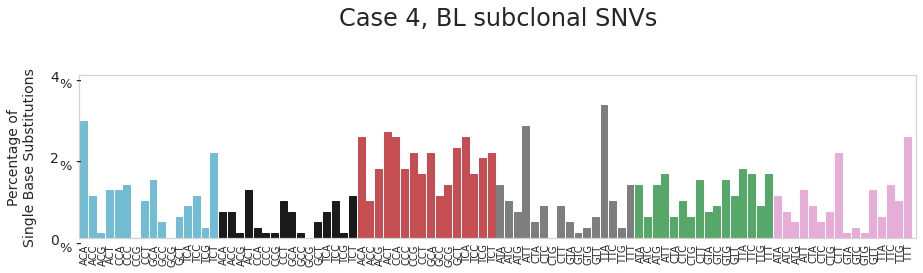

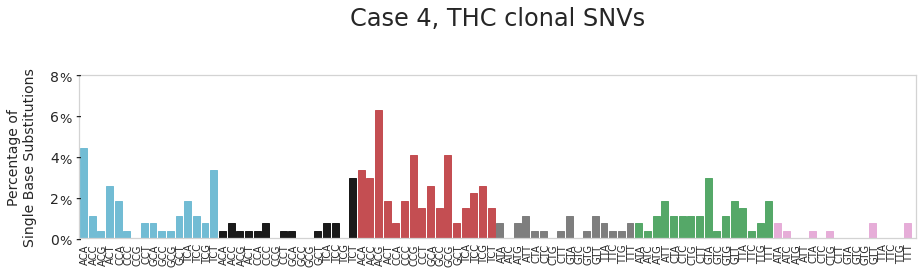

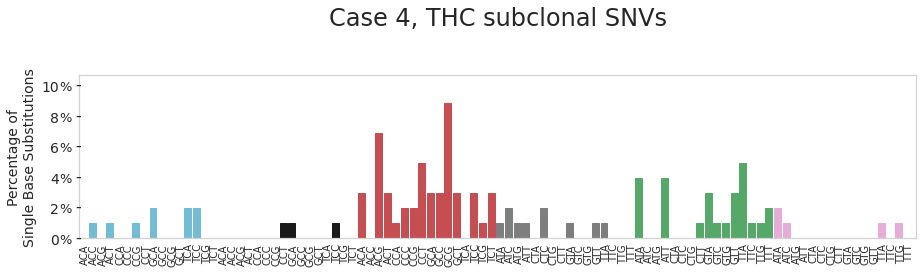

In [5]:
for case in samples_dict.keys():
    pt = pt_to_case[case]  #remove at the end
    root_out_pt = root_out+pt #remove at the end
    for tumor in ['tumor1','tumor2']:
        normal_id = samples_dict[case]['normal']
        tumor_id = samples_dict[case][tumor]
        df1 = pd.read_csv(root_out_pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
        for setting in ['clonal','subclonal']:
            if setting == 'clonal':
                df = df1[(df1['mut_type']=='snv')&(df1['clonal']==True)]
            else:
                df = df1[(df1['mut_type']=='snv')&(df1['clonal']==False)]
            dictionary = df_to_dict(df)

            dict_counts = change_dct_format(dictionary)
            fig, ax = plt.subplots()
            title = title_dict[case+'_'+tumor] +' '+ setting + ' SNVs'
            plot_signature(dict_counts, title=title ,fig=fig,ax=ax,figsize=(15,3),pad=50,labels=[])
            plt.ylabel('Percentage of\nSingle Base Substitutions',size=14)
            ax.yaxis.set_label_coords(-.05, .5)
            ymin, ymax = ax.get_ylim()
            plt.yticks(np.arange(int(ymin), int(ymax)+2, 2.0))
            for pos in range(0,int(ymax)+2,2):
                plt.text(x=-2.8,y=pos-0.3,s='%',size=13)
            for pos in range(0,int(ymax)+2,2):
                plt.text(x=-1,y=pos-0.2,s='-',size=16)
            ax.spines['left'].set_color('lightgrey')        
            ax.spines['top'].set_color('lightgrey')  
            ax.spines['bottom'].set_color('lightgrey')        
            ax.spines['right'].set_color('lightgrey') 
            ax.grid(False)
            plt.savefig("./figures_papers/"+case+"_"+tumor+"_"+setting+"_profile.png",dpi=300, format='png',transparent=True,bbox_inches='tight')

            plt.show()